In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sys, os
sys.path.append(os.path.abspath(".."))
from eval.benchmarks import get_buyhold_df, get_minvariance_df
from eval.evaluate_functions import plot_portfolio_evolution, calculate_portfolio_metrics

In [3]:
from src.preprocess.preprocessor import get_df
from src.config_training import TrainSettings

settings = TrainSettings()


TEST23_START_DATE = settings.TEST23_START_DATE
TEST23_END_DATE = settings.TEST23_END_DATE
TEST24_START_DATE = settings.TEST24_START_DATE
TEST24_END_DATE = settings.TEST24_END_DATE

df_test23 = get_df(TEST23_START_DATE, TEST23_END_DATE, "../src/preprocess/tickers/ticker_lists.json")
df_test24 = get_df(TEST24_START_DATE, TEST24_END_DATE, "../src/preprocess/tickers/ticker_lists.json")

From: 2022-12-02 00:00:00
To: 2024-01-01
Shape of DataFrame:  (8100, 8)
Successfully added technical indicators
From: 2023-12-02 00:00:00
To: 2025-01-01
Shape of DataFrame:  (8130, 8)
Successfully added technical indicators


In [4]:
# LOAD RESULTS

df_RLbase_23 = pd.read_csv("results/dfs/cuenta_test23_RL_baseline.csv")
df_RLbase_24 = pd.read_csv("results/dfs/cuenta_test24_RL_baseline.csv")

df_HRL_23 = pd.read_csv("results/dfs/cuenta_test23_HRL.csv")
df_HRL_24 = pd.read_csv("results/dfs/cuenta_test24_HRL.csv")

df_metaHRL_23 = pd.read_csv("results/dfs/cuenta_test23_metaHRL.csv")
df_metaHRL_24 = pd.read_csv("results/dfs/cuenta_test24_metaHRL.csv")

In [5]:
# LOAD BENCHMARKS

df_buy_hold_23 = get_buyhold_df(df_test23)
df_buy_hold_24 = get_buyhold_df(df_test24)

#df_minvar_23 = get_minvariance_df(df_test23)
#df_minvar_24 = get_minvariance_df(df_test24)

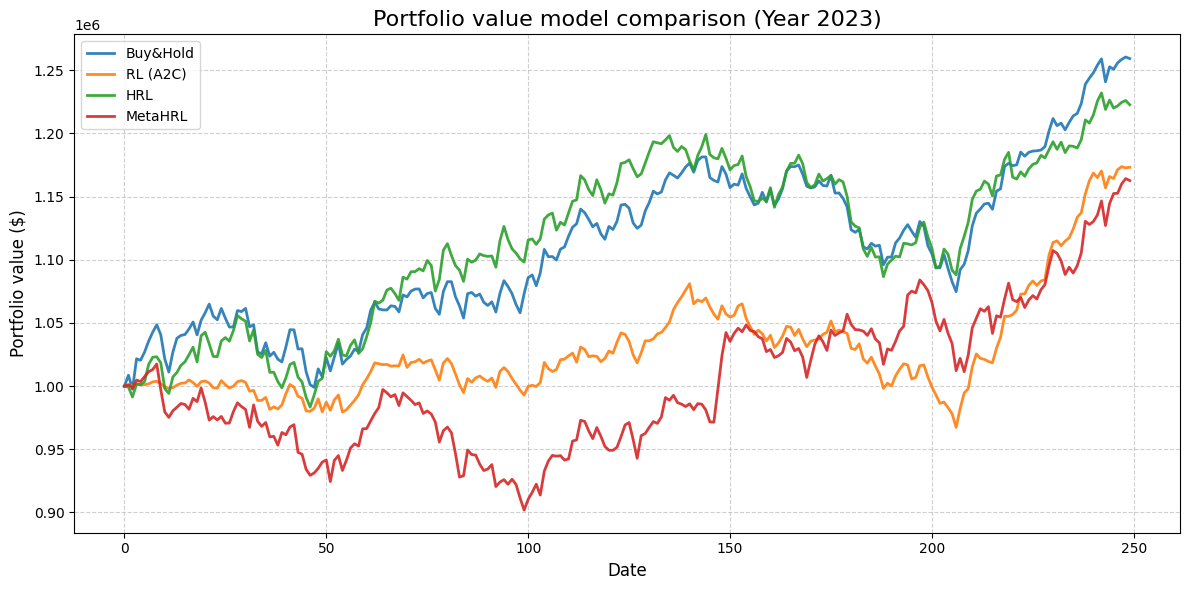

In [23]:
# PLOTS 2023

dfs_23 = [df_buy_hold_23, df_RLbase_23, df_HRL_23, df_metaHRL_23]
labels = ["Buy&Hold", "RL (A2C)", "HRL", "MetaHRL"]
plot_portfolio_evolution(dfs_23, labels, title="Portfolio value model comparison (Year 2023)")

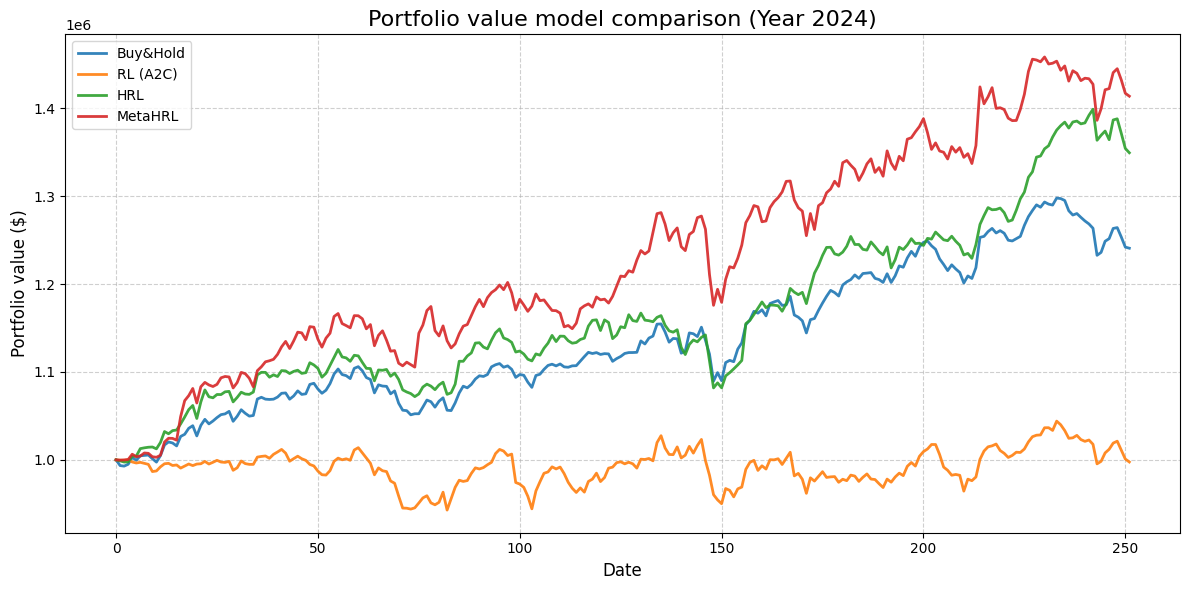

In [24]:
# PLOTS 2024

dfs_24 = [df_buy_hold_24, df_RLbase_24, df_HRL_24, df_metaHRL_24]
plot_portfolio_evolution(dfs_24, labels, title="Portfolio value model comparison (Year 2024)")

In [16]:
import yaml

with open("results/positions.yml", "r", encoding="utf-8") as f:
    positions = yaml.safe_load(f)

print(positions["RL_baseline_23"])


[968, 0, 341, 0, 0, 944, 150, 0, 0, 0, 0, 506, 0, 0, 1456, 0, 0, 42, 0, 0, 0, 712, 0, 331, 0, 0, 48, 0, 0, 1272]


In [ ]:
# 2023 metrics

df1 = calculate_portfolio_metrics(df_metaHRL_23, positions['meta_hrl_23'])

df2 = calculate_portfolio_metrics(df_HRL_23, positions['meta_hrl_23'])
df3 = calculate_portfolio_metrics(df_RLbase_23, positions['RL_baseline_23'])
df4 = calculate_portfolio_metrics(df_buy_hold_23, positions["buy_hold"])

df_final_23 = pd.concat([df1, df2, df3, df4])

df_final_23["Model"] = ["MetaHRL", "HRL", "RL (A2C)", "Buy & Hold"]

df_final_23

,Final Balance ($),Cumulative Return (%),Sharpe Ratio,Diversification (%),Active Assets,Model
0,1162715.56,16.27,1.1275,33.33,10/30,MetaHRL
0,1222752.35,22.28,1.6607,33.33,10/30,HRL
0,1173234.08,17.32,1.7349,36.67,11/30,RL (A2C)
0,1259322.33,25.93,1.9530,100.00,30/30,Buy & Hold


In [21]:
# 2024 metrics

df1 = calculate_portfolio_metrics(df_metaHRL_24, positions['meta_hrl_24'])

df2 = calculate_portfolio_metrics(df_HRL_24, positions['meta_hrl_24'])
df3 = calculate_portfolio_metrics(df_RLbase_24, positions['RL_baseline_24'])
df4 = calculate_portfolio_metrics(df_buy_hold_24, positions["buy_hold"])

df_final_24 = pd.concat([df1, df2, df3, df4])

df_final_24["Model"] = ["MetaHRL", "HRL", "RL (A2C)", "Buy & Hold"]

df_final_24

,Final Balance ($),Cumulative Return (%),Sharpe Ratio,Diversification (%),Active Assets,Model
0,1413592.09,41.36,2.1986,30.00,9/30,MetaHRL
0,1349245.67,34.92,2.5395,30.00,9/30,HRL
0,997605.54,-0.24,0.0435,36.67,11/30,RL (A2C)
0,1240710.67,24.07,2.0348,100.00,30/30,Buy & Hold
